In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import os

In [2]:
data = pd.read_csv('../Data/raw_analyst_ratings.csv')
print(data.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


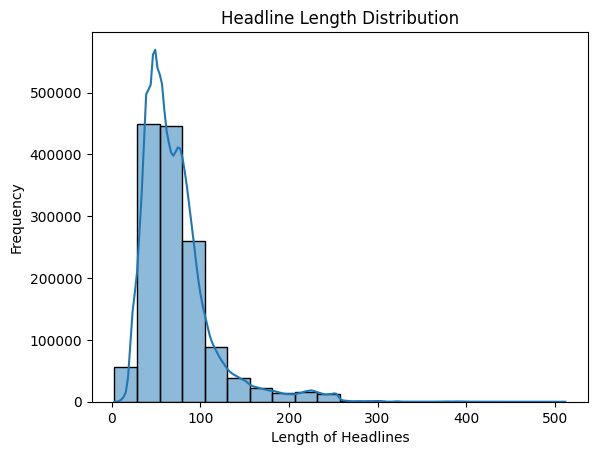

In [3]:
# Add a new column for headline length
data['headline_length'] = data['headline'].apply(len)

# Descriptive statistics for headline length
headline_stats = data['headline_length'].describe()
print(headline_stats)

# Plot headline length distribution
sns.histplot(data['headline_length'], bins=20, kde=True)
plt.title("Headline Length Distribution")
plt.xlabel("Length of Headlines")
plt.ylabel("Frequency")
plt.show()

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Name: count, dtype: int64


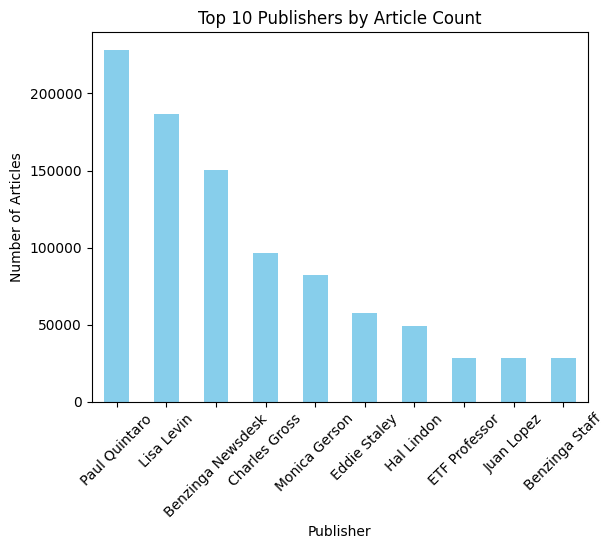

In [4]:
# Count articles per publisher
publisher_counts = data['publisher'].value_counts()

# Print top publishers
print(publisher_counts.head())

# Plot the counts
publisher_counts.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Publishers by Article Count")
plt.xlabel("Publisher")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()

In [5]:
print(data.columns)

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock',
       'headline_length'],
      dtype='object')


C:\Users\hp\AppData\Local\Temp\ipykernel_6632\1196904576.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['year_month'] = data['publication_date'].dt.to_period('M')


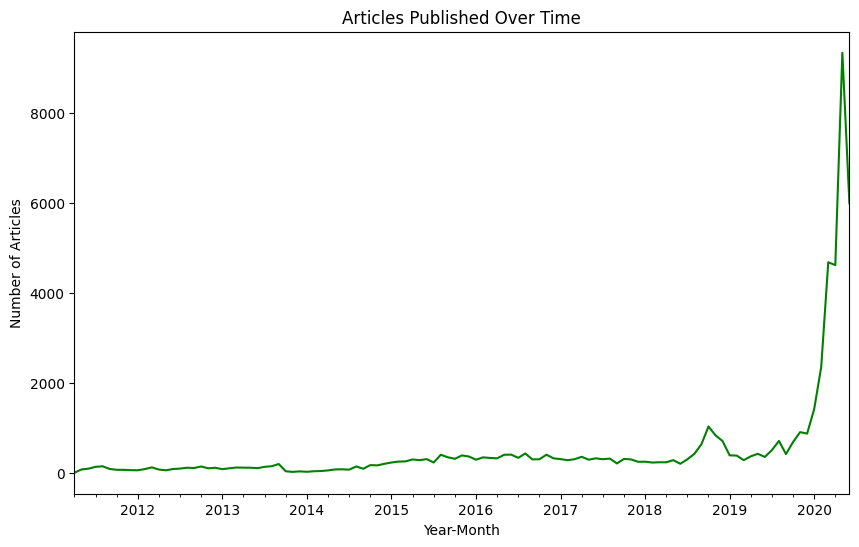

In [6]:
# Convert to datetime
data['publication_date'] = pd.to_datetime(data['date'], errors='coerce')

# Drop rows with invalid dates
data = data.dropna(subset=['publication_date'])

# Extract the year and month
data['year_month'] = data['publication_date'].dt.to_period('M')

# Count articles by year-month
date_counts = data['year_month'].value_counts().sort_index()

# Plot publication trends over time
date_counts.plot(kind='line', figsize=(10, 6), color='green')
plt.title("Articles Published Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Articles")
plt.show()

sentiment
Neutral     37411
Positive    13706
Negative     4870
Name: count, dtype: int64


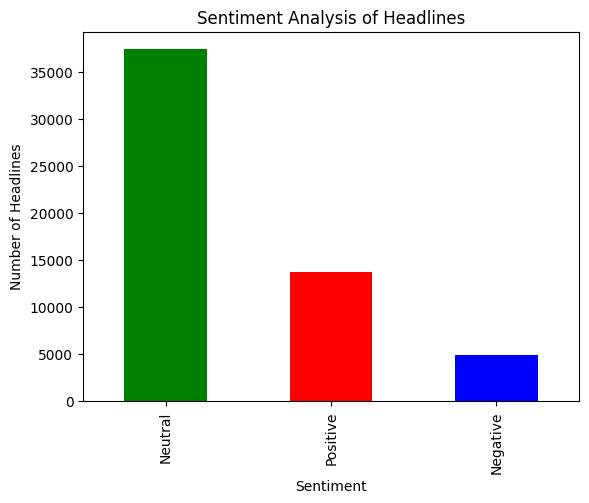

In [9]:
# Define a function to calculate sentiment
def get_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'
    
# Apply the sentiment analysis
data['sentiment'] = data['headline'].apply(get_sentiment)

# Count sentiment categories
sentiment_counts = data['sentiment'].value_counts()
print(sentiment_counts)

# Plot sentiment analysis results
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title("Sentiment Analysis of Headlines")
plt.xlabel("Sentiment")
plt.ylabel("Number of Headlines")
plt.show()

Top Keywords: ['52' 'companies' 'eps' 'estimate' 'higher' 'hit' 'lows' 'maintains'
 'market' 'new' 'price' 'q1' 'sales' 'session' 'shares' 'stocks' 'target'
 'trading' 'week' 'yesterday']


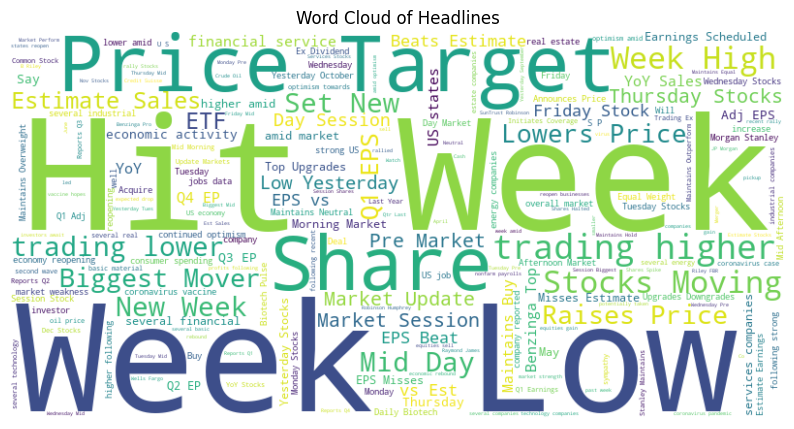

In [10]:
# Extract common keywords from headlines
vectorizer = CountVectorizer(stop_words='english', max_features=20)
keywords_matrix = vectorizer.fit_transform(data['headline'])
keywords = vectorizer.get_feature_names_out()

# Print the top keywords
print("Top Keywords:", keywords)

# Word cloud visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['headline']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Headlines")
plt.show()

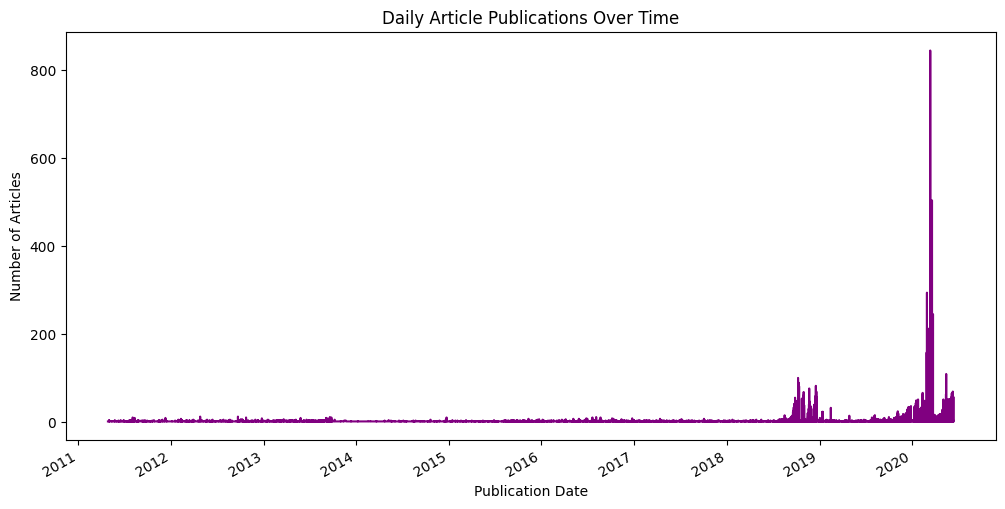

In [11]:
# Group by publication date and count articles
daily_counts = data.groupby('publication_date').size()

# Plot the time series of article publications
daily_counts.plot(kind='line', figsize=(12, 6), color='purple')
plt.title("Daily Article Publications Over Time")
plt.xlabel("Publication Date")
plt.ylabel("Number of Articles")
plt.show()

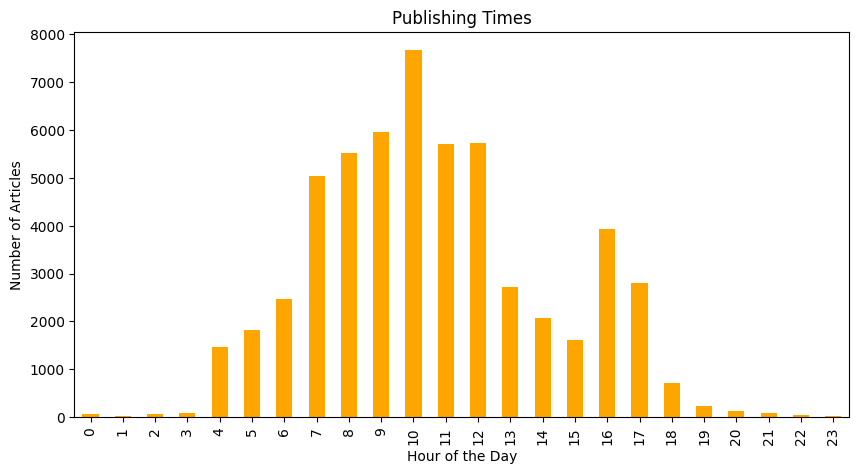

In [12]:
# Extract hour of publication
data['hour'] = data['publication_date'].dt.hour

# Plot publishing times
hourly_counts = data['hour'].value_counts().sort_index()
hourly_counts.plot(kind='bar', color='orange', figsize=(10, 5))
plt.title("Publishing Times")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Articles")
plt.show()


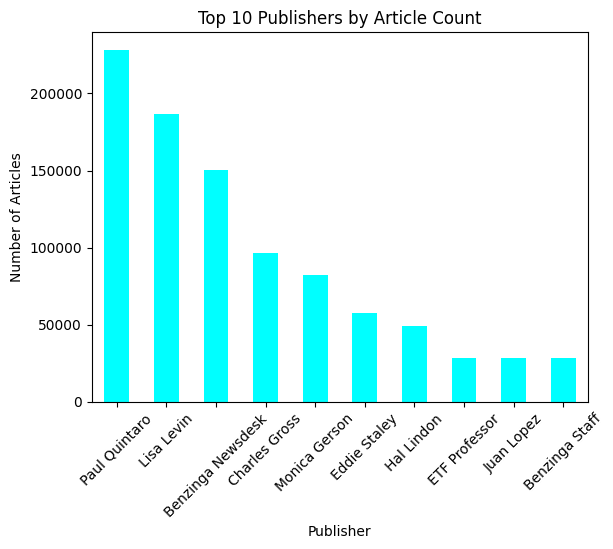

In [13]:
# Count articles per publisher
top_publishers = publisher_counts.head(10)

# Plot the top publishers
top_publishers.plot(kind='bar', color='cyan')
plt.title("Top 10 Publishers by Article Count")
plt.xlabel("Publisher")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()